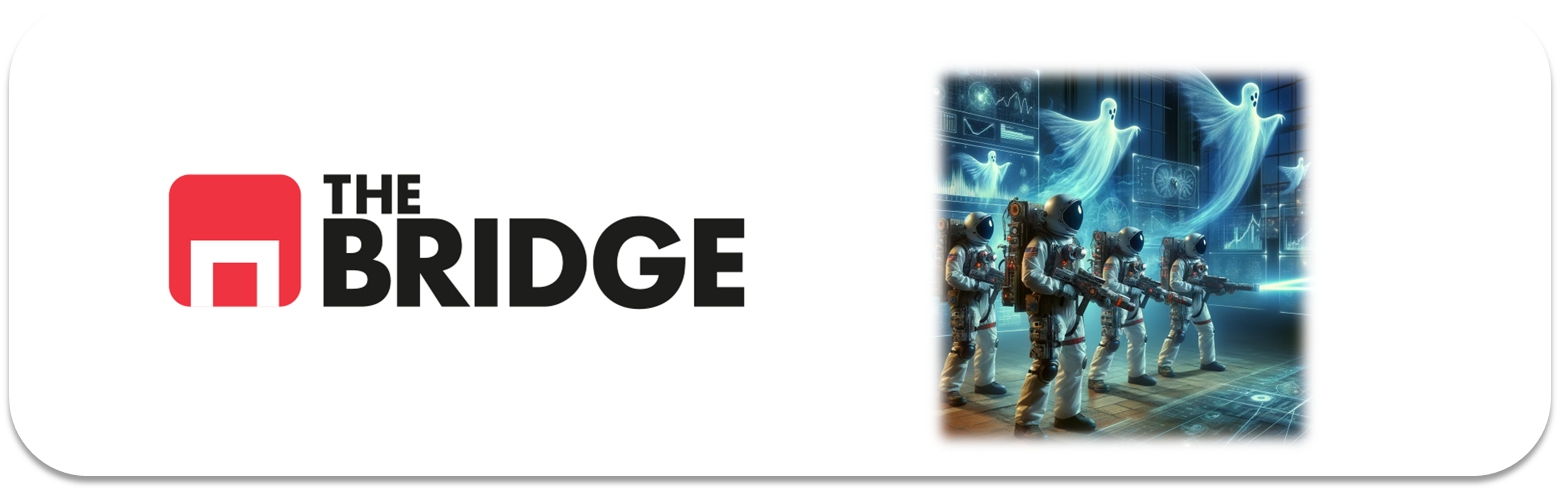

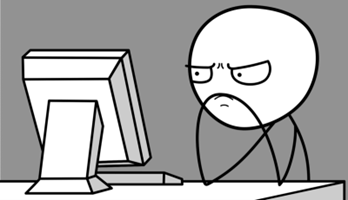

Para ejercitarte y afianzar lo aprendido sobre **Series Temporales**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### El "problema"

Para este ejercicio vamos a predecir cuál será la demanda de pasajeros de una aerolinea, para poder anticiparse a las contrataciones de personal, mantenimiento de las aeronaves y gestión de inventario y comidas.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import pandas as pd
import numpy as np

### Ejercicio 1

Carga los datos y adecúa el dataset teniendo en cuenta que es una serie temporal. Para ello convierte la columna de fecha al formato adecuado y luego úsala como índice.

In [6]:
df = pd.read_csv("./data/AirPassengers.csv")

# Convertir la columna de fecha al formato adecuado
df["date"] = pd.to_datetime(df["date"])

# Establecer la fecha como índice
df.set_index("date", inplace=True)

# Mostrar las primeras filas para verificar
print(df.head())


            value
date             
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121


In [8]:
df.tail(5)

,value
date,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


### Ejercicio 2

¿De qué fecha a qué fecha va el histórico?¿Qué periodicidad tiene la serie?

In [9]:
#Va desde 1949-01-01 hasta 1960-12-01. La periodicidad es mensual.

### Ejercicio 3

¿Cómo es la serie temporal? ¿Tiene tendencia? ¿Aprecias alguna estacionalidad? Analiza de manera gráfica, pero todavía sin descomponer la serie.

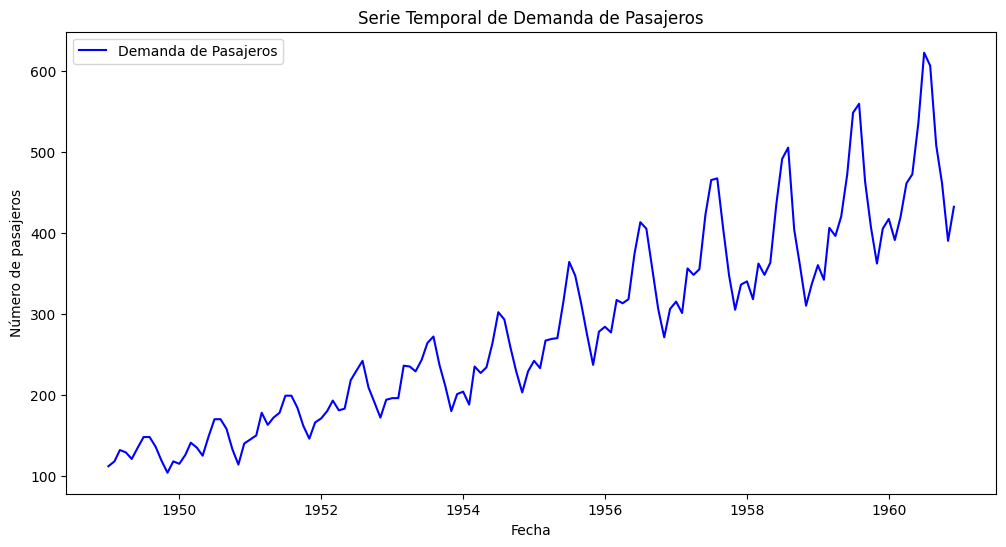

In [10]:
import matplotlib.pyplot as plt

# Graficar la serie temporal
plt.figure(figsize=(12,6))
plt.plot(df, label="Demanda de Pasajeros", color="b")
plt.xlabel("Fecha")
plt.ylabel("Número de pasajeros")
plt.title("Serie Temporal de Demanda de Pasajeros")
plt.legend()
plt.show()


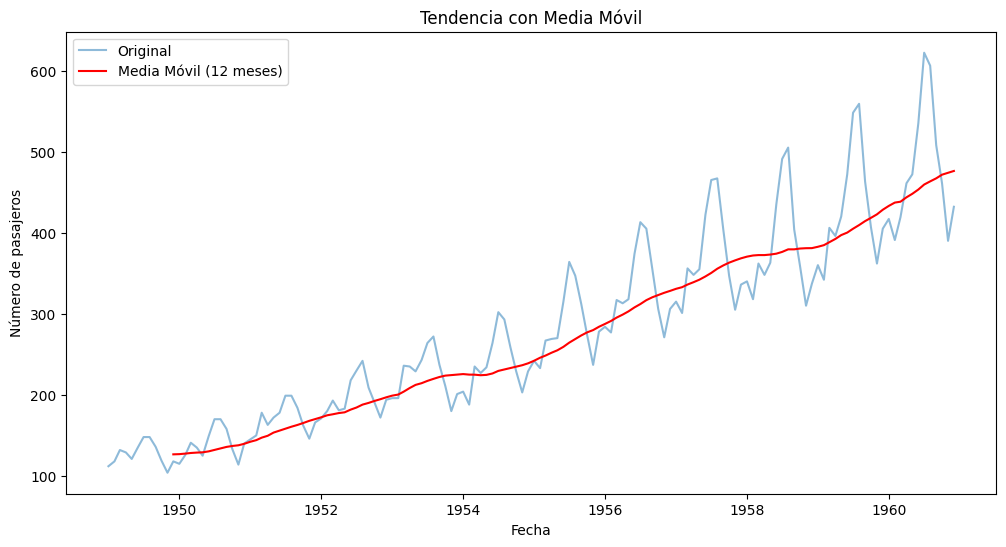

In [11]:
df["media_movil"] = df["value"].rolling(window=12).mean()

plt.figure(figsize=(12,6))
plt.plot(df["value"], label="Original", alpha=0.5)
plt.plot(df["media_movil"], label="Media Móvil (12 meses)", color="red")
plt.xlabel("Fecha")
plt.ylabel("Número de pasajeros")
plt.title("Tendencia con Media Móvil")
plt.legend()
plt.show()


### Ejercicio 4

¿Podrías demostrar de dos maneras estadísticas que la serie no es estacionaria?

In [12]:
from statsmodels.tsa.stattools import adfuller

# Prueba de Dickey-Fuller aumentada
resultado_adf = adfuller(df["value"])

print("Prueba de Dickey-Fuller Aumentada")
print(f"Estadístico ADF: {resultado_adf[0]}")
print(f"p-valor: {resultado_adf[1]}")
print(f"Valores Críticos: {resultado_adf[4]}")

if resultado_adf[1] > 0.05:
    print("❌ No podemos rechazar la hipótesis nula: la serie NO es estacionaria.")
else:
    print("✅ Rechazamos la hipótesis nula: la serie es estacionaria.")


Prueba de Dickey-Fuller Aumentada
Estadístico ADF: 0.8153688792060447
p-valor: 0.9918802434376409
Valores Críticos: {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
❌ No podemos rechazar la hipótesis nula: la serie NO es estacionaria.


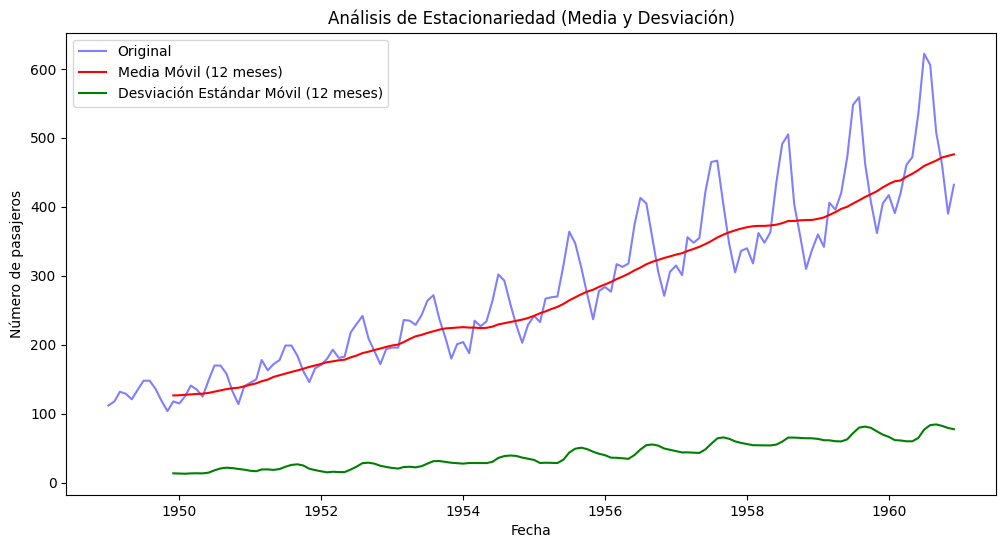

In [13]:
# Calcular media móvil y desviación estándar móvil
rolling_mean = df["value"].rolling(window=12).mean()
rolling_std = df["value"].rolling(window=12).std()

# Graficar
plt.figure(figsize=(12,6))
plt.plot(df["value"], label="Original", color="blue", alpha=0.5)
plt.plot(rolling_mean, label="Media Móvil (12 meses)", color="red")
plt.plot(rolling_std, label="Desviación Estándar Móvil (12 meses)", color="green")
plt.xlabel("Fecha")
plt.ylabel("Número de pasajeros")
plt.title("Análisis de Estacionariedad (Media y Desviación)")
plt.legend()
plt.show()


### Ejercicio 5

Emplea la descomposición que hemos aprendido en el workout para representar gráficamente la tendencia. Si has mostrado gráficamente la tendencia en el ejercicio 3, compara ambos.

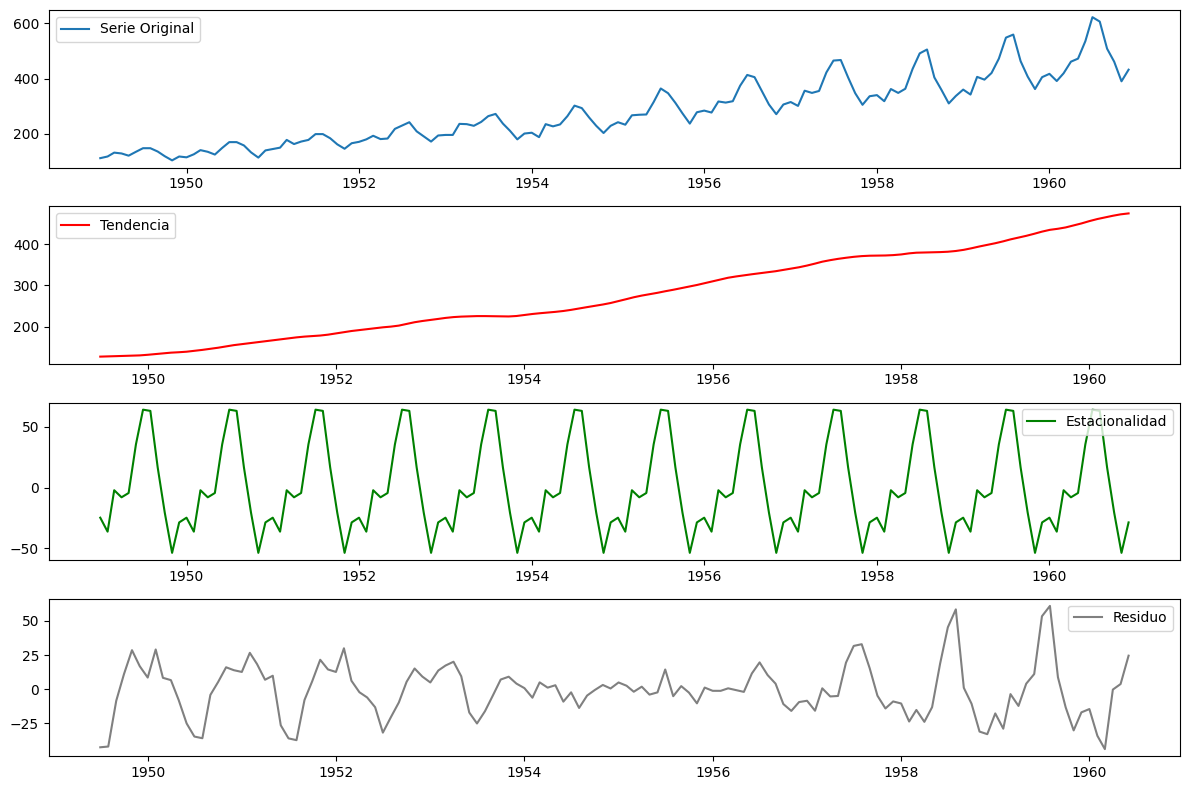

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomposición de la serie (modelo aditivo porque los valores aumentan con el tiempo)
descomposicion = seasonal_decompose(df["value"], model="additive", period=12)

# Graficar los componentes
plt.figure(figsize=(12,8))

plt.subplot(4,1,1)
plt.plot(df["value"], label="Serie Original")
plt.legend()

plt.subplot(4,1,2)
plt.plot(descomposicion.trend, label="Tendencia", color="red")
plt.legend()

plt.subplot(4,1,3)
plt.plot(descomposicion.seasonal, label="Estacionalidad", color="green")
plt.legend()

plt.subplot(4,1,4)
plt.plot(descomposicion.resid, label="Residuo", color="gray")
plt.legend()

plt.tight_layout()
plt.show()


### Ejercicio 6

Visualiza todos los componentes de la serie temporal por separado

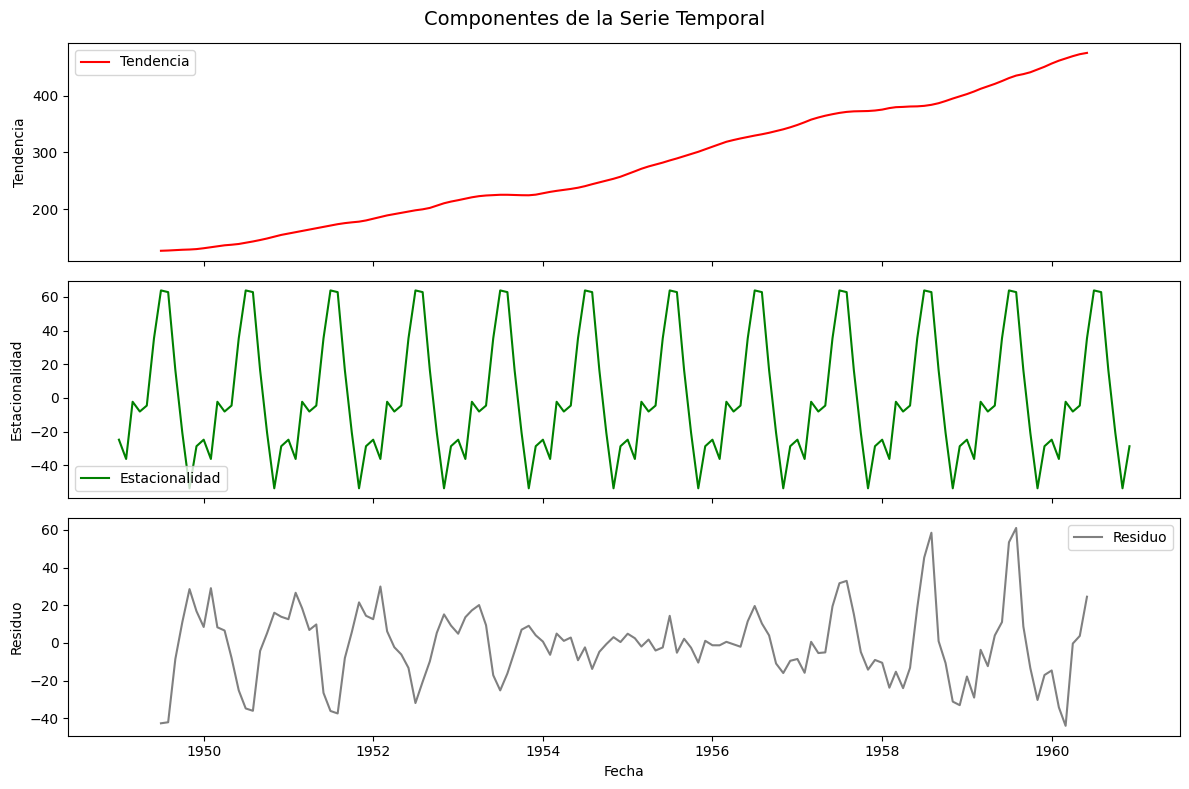

In [16]:
# Descomposición de la serie (modelo aditivo)
descomposicion = seasonal_decompose(df["value"], model="additive", period=12)

# Extraer componentes
tendencia = descomposicion.trend
estacionalidad = descomposicion.seasonal
residuo = descomposicion.resid

# Graficar los componentes por separado
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Tendencia
axes[0].plot(tendencia, color="red", label="Tendencia")
axes[0].legend()
axes[0].set_ylabel("Tendencia")

# Estacionalidad
axes[1].plot(estacionalidad, color="green", label="Estacionalidad")
axes[1].legend()
axes[1].set_ylabel("Estacionalidad")

# Residuo
axes[2].plot(residuo, color="gray", label="Residuo")
axes[2].legend()
axes[2].set_ylabel("Residuo")

plt.xlabel("Fecha")
plt.suptitle("Componentes de la Serie Temporal", fontsize=14)
plt.tight_layout()
plt.show()


### Ejercicio 7

Crea una matriz de correlación con los últimos 24 instantes (matriz de autocorrelación). Crea un dataframe con shift de 1 a 24 para ello, la idea es que puedas hacer una matriz de correlación con el valor actual y los 24 valores anteriores. Es decir de un mes con sus 23 meses anteriores. Interpreta la estacionalidad

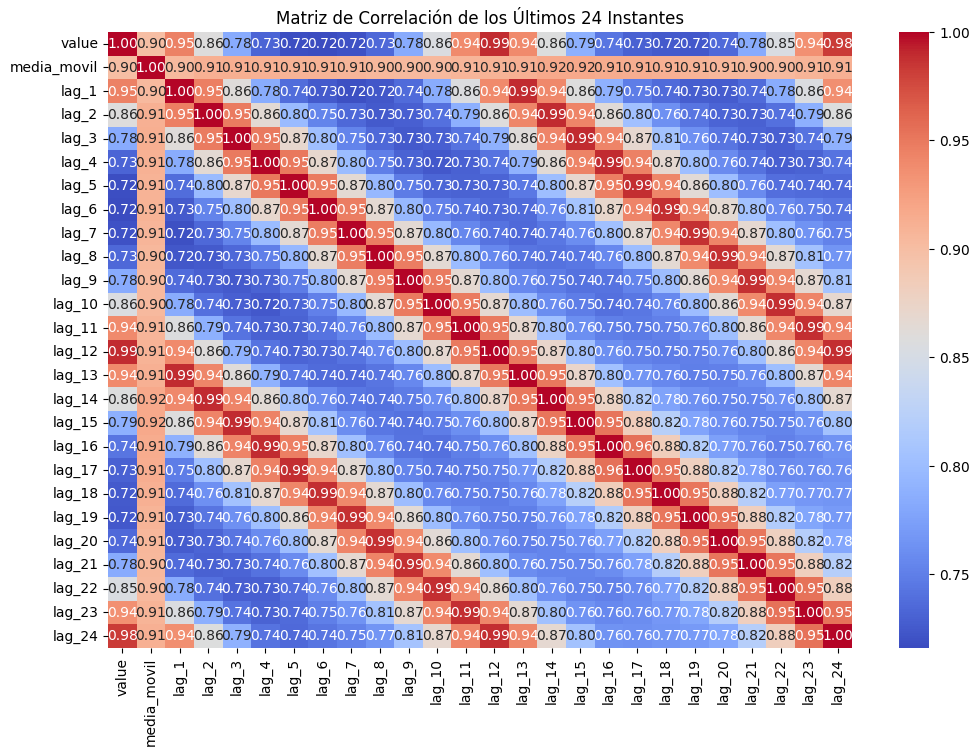

In [17]:
import seaborn as sns
# Crear un dataframe con shifts de 1 a 24 meses
df_shifted = df.copy()
for i in range(1, 25):  
    df_shifted[f"lag_{i}"] = df_shifted["value"].shift(i)

# Eliminar filas con valores NaN generados por el shift
df_shifted = df_shifted.dropna()

# Calcular la matriz de correlación
corr_matrix = df_shifted.corr()

# Graficar la matriz de correlación (solo con los lags)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación de los Últimos 24 Instantes")
plt.show()


### Ejercicio 8
Ya hemos visto que hay seasonality. ¿Cada cuántos instantes se cumple ese patrón?

<Figure size 1200x600 with 0 Axes>

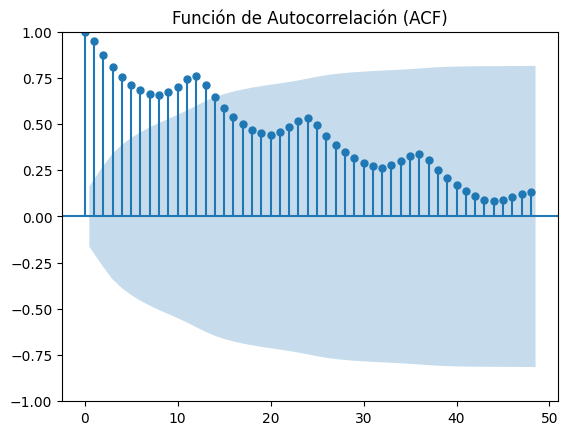

In [18]:
from statsmodels.graphics.tsaplots import plot_acf


# Graficar la función de autocorrelación
plt.figure(figsize=(12,6))
plot_acf(df["value"], lags=48)  # Analizamos hasta 48 meses (4 años)
plt.title("Función de Autocorrelación (ACF)")
plt.show()


### Ejercicio 9

 Divide en train y test. En este caso no haremos división en validación, entre otras razones por la cantidad de datos que tenemos. Guarda 20 muestras para test.

In [19]:
# Definir el número de muestras para test
n_test = 20  

# División en train y test
train = df.iloc[:-n_test]
test = df.iloc[-n_test:]

# Mostrar las dimensiones de cada conjunto
print(f"Tamaño de Train: {train.shape[0]} muestras")
print(f"Tamaño de Test: {test.shape[0]} muestras")


Tamaño de Train: 124 muestras
Tamaño de Test: 20 muestras


### Ejercicio 10

Pon en práctica lo visto en clases, crea un modelo de ARIMA (puedes utilizar autoarima), mide su RMSE y su MAPE. Comparalo gráficamente con los valores reales.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/pytho

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1180.340, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1174.338, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1171.576, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1179.124, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1164.464, Time=0.03 sec


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/pytho

 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1171.757, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1163.079, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1170.015, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1172.799, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1156.122, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1170.365, Time=0.01 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=1157.085, Time=0.03 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1158.312, Time=0.03 sec


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/pytho

 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1159.679, Time=0.02 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=1170.299, Time=0.01 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=1151.726, Time=0.04 sec
 ARIMA(4,1,2)(0,0,0)[0]             : AIC=1147.415, Time=0.05 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=1156.709, Time=0.04 sec
 ARIMA(5,1,2)(0,0,0)[0]             : AIC=1149.384, Time=0.05 sec


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,3)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(3,1,3)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=1157.578, Time=0.06 sec


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,3)(0,0,0)[0]             : AIC=1144.103, Time=0.13 sec
 ARIMA(5,1,4)(0,0,0)[0]             : AIC=inf, Time=0.20 sec


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,4)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec

Best model:  ARIMA(5,1,3)(0,0,0)[0]          
Total fit time: 1.624 seconds


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregres

ARIMA - RMSE: 113.16
ARIMA - MAPE: 17.15%


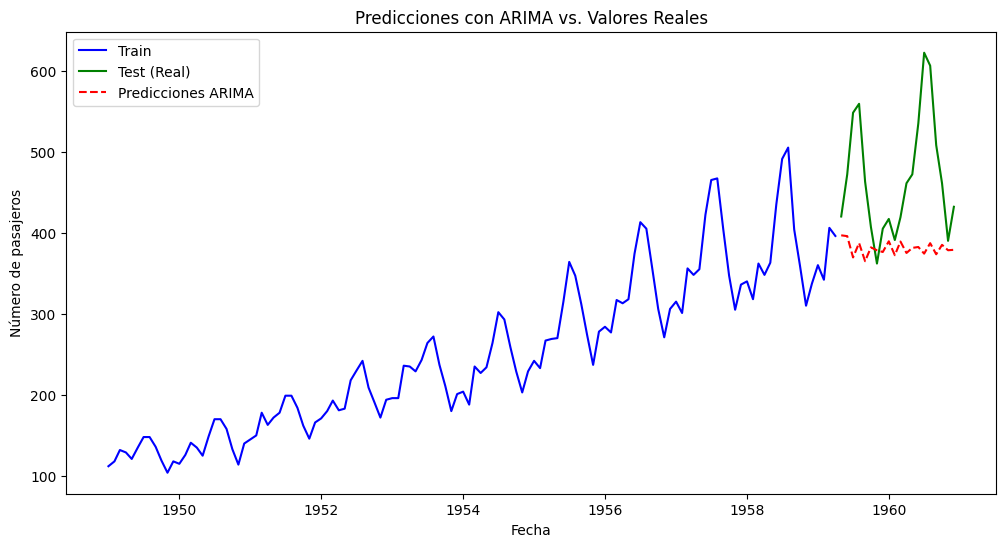

In [32]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt

# Convertir a serie unidimensional
train = train['value']
test = test['value']

# 1. Encontrar los mejores parámetros ARIMA automáticamente
modelo_auto = auto_arima(train, seasonal=False, trace=True, suppress_warnings=True, stepwise=True)

# 2. Ajustar el modelo ARIMA con los parámetros encontrados
p, d, q = modelo_auto.order
modelo_arima = ARIMA(train, order=(p, d, q))
modelo_fit = modelo_arima.fit()

# 3. Realizar predicciones sobre el conjunto de test
predicciones_arima = modelo_fit.forecast(steps=len(test))

# 4. Evaluar el modelo con RMSE y MAPE
rmse_arima = np.sqrt(mean_squared_error(test, predicciones_arima))
mape_arima = mean_absolute_percentage_error(test, predicciones_arima) * 100

print(f"ARIMA - RMSE: {rmse_arima:.2f}")
print(f"ARIMA - MAPE: {mape_arima:.2f}%")

# 5. Comparación gráfica entre valores reales y predicciones
plt.figure(figsize=(12,6))
plt.plot(train, label="Train", color="blue")
plt.plot(test, label="Test (Real)", color="green")
plt.plot(test.index, predicciones_arima, label="Predicciones ARIMA", color="red", linestyle="dashed")
plt.xlabel("Fecha")
plt.ylabel("Número de pasajeros")
plt.title("Predicciones con ARIMA vs. Valores Reales")
plt.legend()
plt.show()


In [31]:
# Divide el DataFrame en train y test
train = df.iloc[:-20]  # Usamos todo excepto los últimos 20 registros para el train
test = df.iloc[-20:]   # Los últimos 20 registros para el test

# Verifica que la división sea correcta
print(train.head())
print(test.head())

# Selecciona solo la columna 'value'
train_series = train['value']
test_series = test['value']


            value  media_movil
date                          
1949-01-01    112          NaN
1949-02-01    118          NaN
1949-03-01    132          NaN
1949-04-01    129          NaN
1949-05-01    121          NaN
            value  media_movil
date                          
1959-05-01    420   397.083333
1959-06-01    472   400.166667
1959-07-01    548   404.916667
1959-08-01    559   409.416667
1959-09-01    463   414.333333


### Ejercicio 11

Haz lo mismo que en el ejercicio 10 pero con un modelo SARIMA. ¿Cuál es mejor y por qué?

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA - RMSE: 554456802478350152274558029502150032228352.00
SARIMA - MAPE: 28990316139057680031588865613865687187456.00%


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


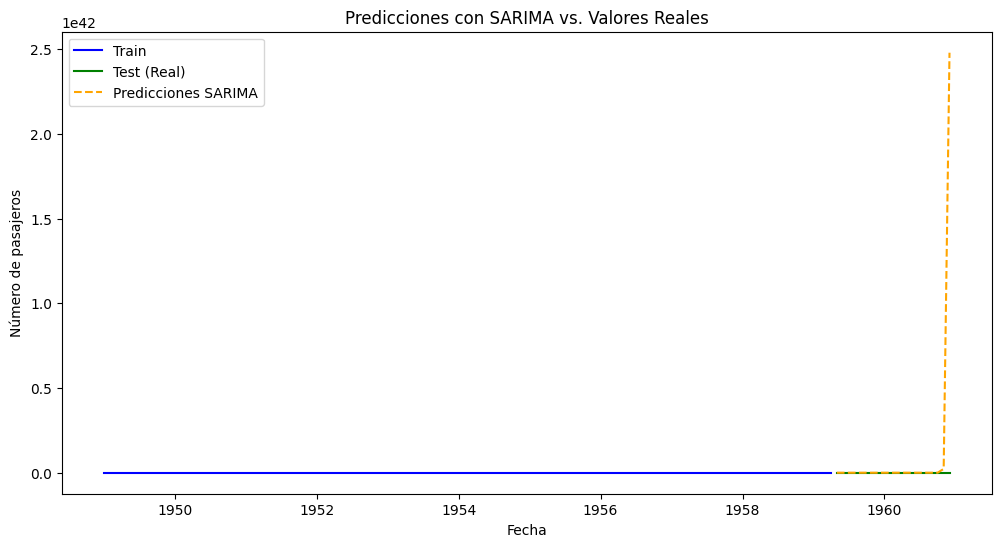

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Definir el modelo SARIMA
# El parámetro 'seasonal_order' se puede ajustar dependiendo de la estacionalidad que observes en tus datos. 
# Usualmente (1, 1, 1, 12) es una buena elección si la estacionalidad es anual (12 meses).
# Usaremos los parámetros (p,d,q) que ya encontramos con ARIMA.

# Ajustar el modelo SARIMA con los mismos parámetros que ARIMA, pero agregando estacionalidad
modelo_sarima = SARIMAX(train_series, 
                        order=(5, 1, 3),  # Parámetros (p,d,q) encontrados con ARIMA
                        seasonal_order=(1, 1, 1, 12),  # Estacionalidad anual (12 meses)
                        enforce_stationarity=False, 
                        enforce_invertibility=False)

# Ajustar el modelo SARIMA
modelo_sarima_fit = modelo_sarima.fit(disp=False)

# Realizar predicciones sobre el conjunto de test
predicciones_sarima = modelo_sarima_fit.forecast(steps=len(test_series))

# Evaluar el modelo con RMSE y MAPE
rmse_sarima = np.sqrt(mean_squared_error(test_series, predicciones_sarima))
mape_sarima = mean_absolute_percentage_error(test_series, predicciones_sarima) * 100

print(f"SARIMA - RMSE: {rmse_sarima:.2f}")
print(f"SARIMA - MAPE: {mape_sarima:.2f}%")

# Comparación gráfica entre valores reales y predicciones SARIMA
plt.figure(figsize=(12,6))
plt.plot(train_series, label="Train", color="blue")
plt.plot(test_series, label="Test (Real)", color="green")
plt.plot(test.index, predicciones_sarima, label="Predicciones SARIMA", color="orange", linestyle="dashed")
plt.xlabel("Fecha")
plt.ylabel("Número de pasajeros")
plt.title("Predicciones con SARIMA vs. Valores Reales")
plt.legend()
plt.show()


In [34]:
modelo_sarima = SARIMAX(train_series, 
                        order=(5, 1, 3),  # Parámetros ARIMA
                        seasonal_order=(1, 1, 1, 12),  # Estacionalidad anual (12 meses)
                        enforce_stationarity=False, 
                        enforce_invertibility=False)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [35]:
from pmdarima import auto_arima

modelo_auto_sarima = auto_arima(train_series, seasonal=True, m=12, stepwise=True, trace=True)
print(modelo_auto_sarima.summary())


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/pytho

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=843.411, Time=0.62 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=942.581, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=841.692, Time=0.14 sec


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=890.316, Time=0.13 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1100.615, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=841.349, Time=0.03 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=841.921, Time=0.08 sec


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=841.844, Time=0.04 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=842.275, Time=0.04 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=889.425, Time=0.03 sec


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=842.600, Time=0.11 sec
 ARIMA(1,0,0)(0,1,0)[12]             : AIC=849.916, Time=0.06 sec

Best model:  ARIMA(1,0,0)(0,1,0)[12] intercept
Total fit time: 1.690 seconds
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  124
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -417.675
Date:                            Sun, 16 Feb 2025   AIC                            841.349
Time:                                    12:19:31   BIC                            849.505
Sample:                                01-01-1949   HQIC                           844.658
                                     - 04-01-1959                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


SARIMA - RMSE: 554456802478350152274558029502150032228352.00
SARIMA - MAPE: 28990316139057680031588865613865687187456.00%


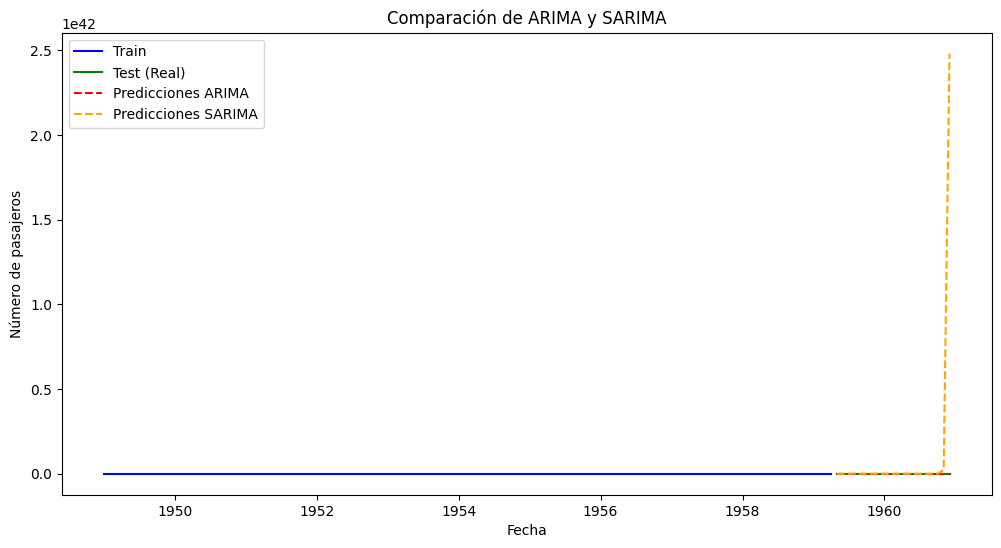

In [36]:
# Predicciones con SARIMA
predicciones_sarima = modelo_sarima_fit.forecast(steps=len(test))

# Evaluar el modelo SARIMA con RMSE y MAPE
rmse_sarima = np.sqrt(mean_squared_error(test_series, predicciones_sarima))
mape_sarima = mean_absolute_percentage_error(test_series, predicciones_sarima) * 100

print(f"SARIMA - RMSE: {rmse_sarima:.2f}")
print(f"SARIMA - MAPE: {mape_sarima:.2f}%")

# Comparación gráfica entre los modelos
plt.figure(figsize=(12,6))
plt.plot(train_series, label="Train", color="blue")
plt.plot(test_series, label="Test (Real)", color="green")
plt.plot(test.index, predicciones_arima, label="Predicciones ARIMA", color="red", linestyle="dashed")
plt.plot(test.index, predicciones_sarima, label="Predicciones SARIMA", color="orange", linestyle="dashed")
plt.xlabel("Fecha")
plt.ylabel("Número de pasajeros")
plt.title("Comparación de ARIMA y SARIMA")
plt.legend()
plt.show()
